<h1><b> #Building a Custom Image Dataset From Google Images</b> </h1>
Recommendation : Use Google Collab

## <b> <I> 1-Importing Library </I> </b>

*This line of code imports the fastai library that we’ll use, as well as all dependencies. We are importing *, which is not generally recommended in software engineering best practices.However, in the case of the fastai library — which is designed specifically for use in Jupyter Notebooks and other read-eval-print loop (REPL) environments — it’s able to avoid polluting the namespace and makes all necessary ‘tools’ available for the user to use. So, we’re happy to import using ‘*’ in this instance.

In [ ]:
from fastai.vision import *

## <b> <I> 2-Search on Google Images </I> </b>

Go to [Google Images](https://images.google.com) and search for the images you are interested in. Try to be specific in your Google Search.
Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.


## <b> <I> 3-Download into file </I> </b> 
Now you must run some <b>Javascript code</b> in your browser which will save the URLs of all the images you want for you dataset.

<b> On Windows </b>

1- In Google Chrome press Ctrl+Shift+j

2- In Firefox press Ctrl+Shift+k

<b> On MacOS </b>

1- In Google Chrome press Cmd+Opt+j

2- In Firefox press Cmd+Opt+j

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions if any.

<b>Reason: </b>The window.open() command doesn't work otherwise.

<b>Code to run on JavaScricpt Console: </b>

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
<b> Important:</b>
These commands will download a file containing urls of all images.By Default it's extention is .csv if it is not, go to download folder and rename it as "Urls_yourDatasetName_.csv" and save changes.

## <b> <i> 4-Create directory and upload urls file into your server </I></b>
Set the folder Name as your dataset name and filename respectively. 

In [5]:
folder = 'shirts'
file = 'urls_shirts.csv'

In [7]:
folder = 'pants'
file = 'urls_pants.csv'

You will need to run this cell once per each category.

In [9]:
path = Path('data/clothes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/clothes/shirts'),
 PosixPath('data/clothes/pants'),
 PosixPath('data/clothes/.ipynb_checkpoints')]

Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

<b> Image-1 </b>

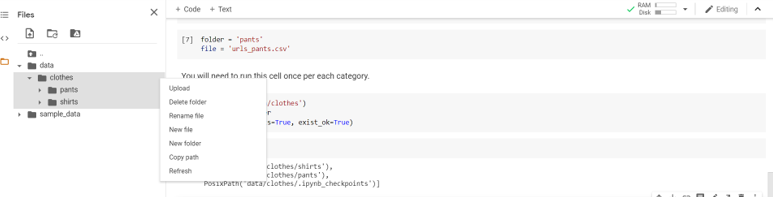

<b> Image-2 </b>
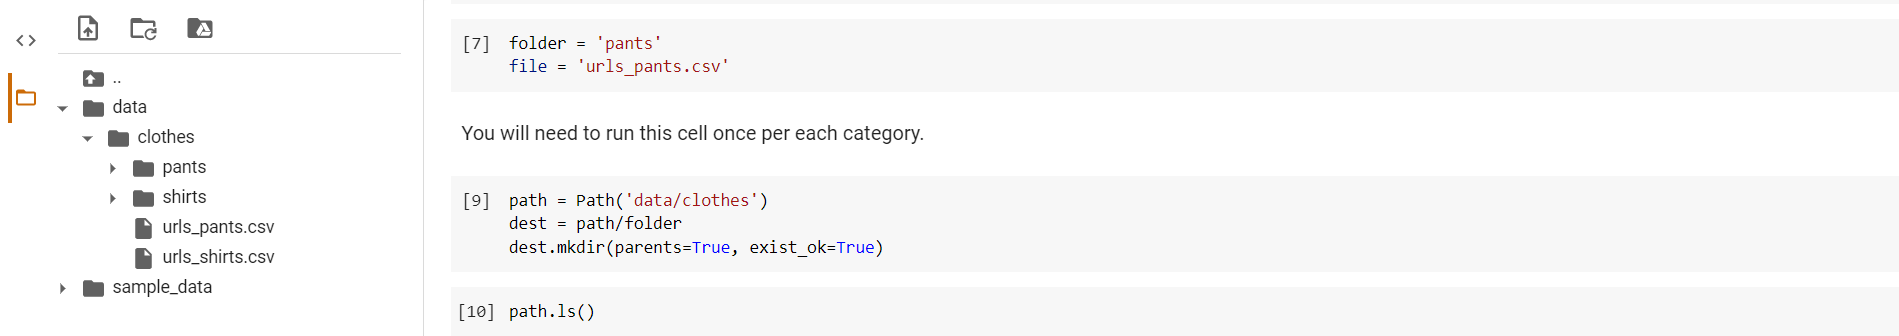


<b> <I> 5-Download images </i> </b>

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [11]:
classes = ['shirts','pants']

In [12]:
download_images(path/file, dest, max_pics=200)

## **Congrats! Images are now in your desired folders.**

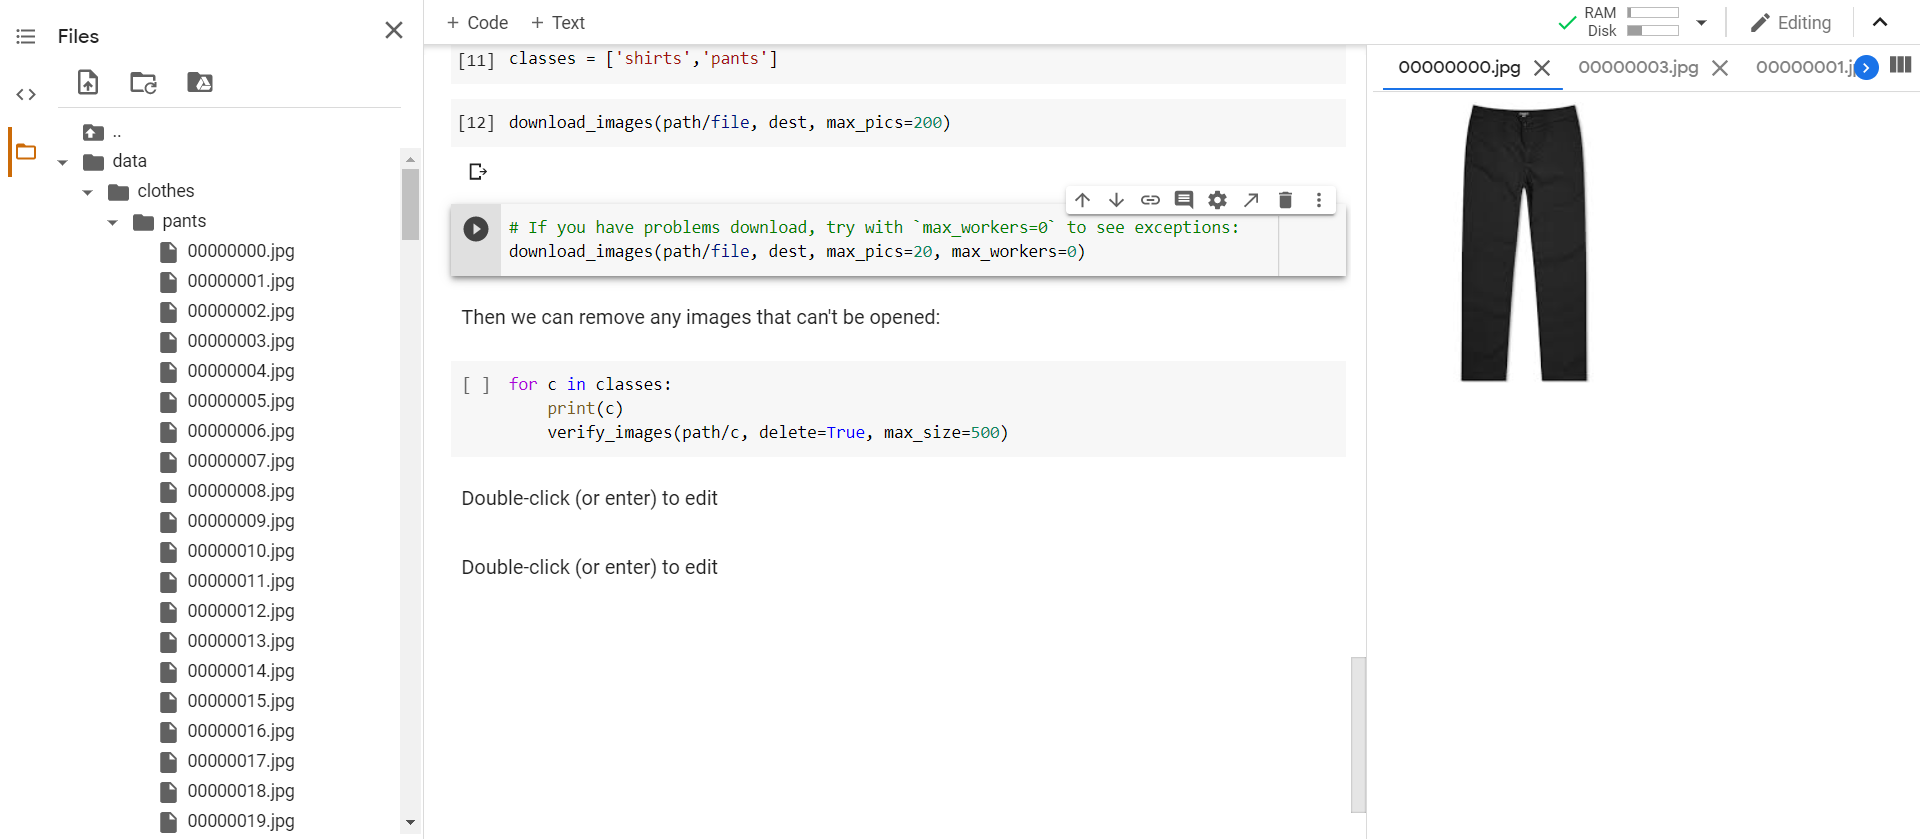

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

We can remove any images that can't be opened:

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)